In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC


In [2]:
# Ссылка на датасет
url = 'https://raw.githubusercontent.com/injchernomor/ml-libraries-project/refs/heads/dev/data-source/data/output1.csv'
df = pd.read_csv(url)
df.head()

,encrypted_word,encryption_algorithm
0,04145628c4a8befbf5579768482fef4b57efed15030099...,sha256
1,ab46aeaba95f702e57694d410fe770068c1850c941741d...,sha256
2,42c241043c6cd86fdf1026a96f0090c56607e7cdc3ba09...,sha256
3,eb128f5be03565e1ae9d494ff1b7a2b8c33d4737c435de...,sha256
4,eb5b3162f1545adb0b9c3be4199d338c621242214edc88...,sha256


In [16]:
# Извлечение характеристик
def extract_features(encrypted_value):
    encrypted_value = str(encrypted_value)
    lenn = len(encrypted_value)
    a = encrypted_value.count('a')/lenn
    b = encrypted_value.count('b')/lenn
    c = encrypted_value.count('c')/lenn
    d = encrypted_value.count('d')/lenn
    e = encrypted_value.count('e')/lenn
    f = encrypted_value.count('f')/lenn
    g = encrypted_value.count('g')/lenn
    h = encrypted_value.count('h')/lenn
    i = encrypted_value.count('i')/lenn
    j = encrypted_value.count('j')/lenn
    k = encrypted_value.count('k')/lenn
    l = encrypted_value.count('l')/lenn
    m = encrypted_value.count('m')/lenn
    n = encrypted_value.count('n')/lenn
    o = encrypted_value.count('o')/lenn
    p = encrypted_value.count('p')/lenn
    q = encrypted_value.count('q')/lenn
    r = encrypted_value.count('r')/lenn
    s = encrypted_value.count('s')/lenn
    t = encrypted_value.count('t')/lenn
    u = encrypted_value.count('u')/lenn
    v = encrypted_value.count('v')/lenn
    w = encrypted_value.count('w')/lenn
    x = encrypted_value.count('x')/lenn
    y = encrypted_value.count('y')/lenn
    z = encrypted_value.count('z')/lenn
    zero = encrypted_value.count('0')/lenn
    one= encrypted_value.count('1')/lenn
    two= encrypted_value.count('2')/lenn
    free= encrypted_value.count('3')/lenn
    four= encrypted_value.count('4')/lenn
    fife= encrypted_value.count('5')/lenn
    six= encrypted_value.count('6')/lenn
    seven= encrypted_value.count('7')/lenn
    eight= encrypted_value.count('8')/lenn
    nine= encrypted_value.count('9')/lenn
    ten= encrypted_value.count('10')/lenn
    return [a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t, u, v, w, x, y, z,zero,one,two,free,four,fife,six,seven,eight,nine,ten
]

In [17]:
# Применяем функцию извлечения характеристик ко всем данным
features = np.array([extract_features(value) for value in df['encrypted_word']])
features

array([[0.015625, 0.046875, 0.078125, ..., 0.078125, 0.046875, 0.      ],
       [0.09375 , 0.03125 , 0.046875, ..., 0.046875, 0.046875, 0.015625],
       [0.0625  , 0.015625, 0.109375, ..., 0.046875, 0.078125, 0.03125 ],
       ...,
       [0.0625  , 0.      , 0.09375 , ..., 0.09375 , 0.15625 , 0.      ],
       [0.0625  , 0.03125 , 0.09375 , ..., 0.03125 , 0.0625  , 0.      ],
       [0.125   , 0.09375 , 0.0625  , ..., 0.03125 , 0.03125 , 0.      ]])

In [18]:
# Определение меток
labels = df['encryption_algorithm'].values  # Используем тип шифрования как метки
labels

array(['sha256', 'sha256', 'sha256', ..., 'md5', 'md5', 'md5'],
      dtype=object)

In [19]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [20]:
# Обучение наивного байесовского классификатора
model = GaussianNB()
model.fit(X_train, y_train)



GaussianNB()

In [21]:
SVM_Model = SVC(kernel="rbf")
SVM_Model.fit(X_train,y_train)

SVC()

In [22]:
# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

In [23]:
# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy baes: {accuracy:.2f}')
predictions_SVM = SVM_Model.predict(X_test)
print(f"SVM accuracy score: {accuracy_score(predictions_SVM,y_test)*100}")

Accuracy baes: 0.84
SVM accuracy score: 84.1873736773273


In [24]:
# Вывод отчета о классификации и матрицы замешивания
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         md5       0.86      0.81      0.83      8434
      sha256       0.82      0.86      0.84      8388

    accuracy                           0.84     16822
   macro avg       0.84      0.84      0.84     16822
weighted avg       0.84      0.84      0.84     16822

Confusion Matrix:
[[6861 1573]
 [1156 7232]]


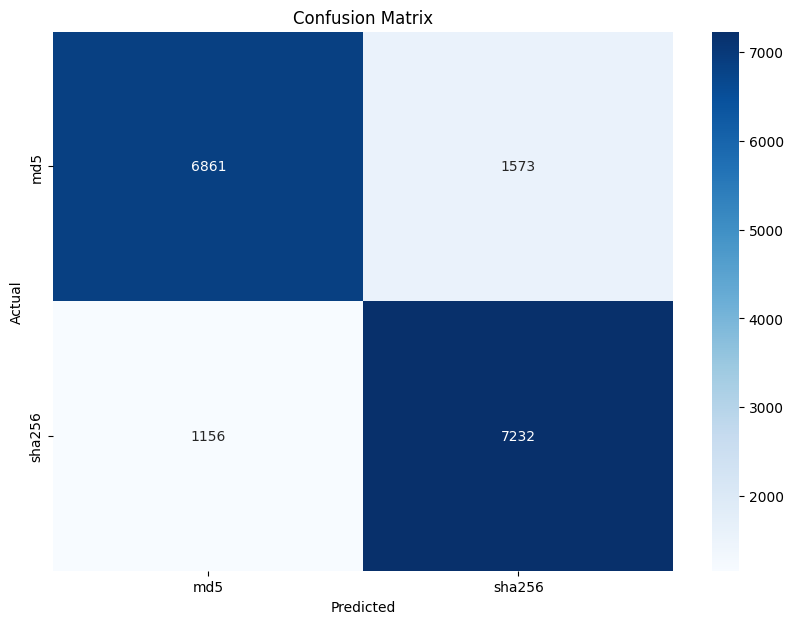

In [25]:
# Вывод отчета графиком
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [26]:
# Проверка с использованием нового значения

# Функция для извлечения признаков из одиночного примера
# Извлечение характеристик
def extract_features_solo(encrypted_value):
    encrypted_value = str(encrypted_value)
    a = encrypted_value.count('a')
    b = encrypted_value.count('b')
    c = encrypted_value.count('c')
    d = encrypted_value.count('d')
    e = encrypted_value.count('e')
    f = encrypted_value.count('f')
    g = encrypted_value.count('g')
    h = encrypted_value.count('h')
    i = encrypted_value.count('i')
    j = encrypted_value.count('j')
    k = encrypted_value.count('k')
    l = encrypted_value.count('l')
    m = encrypted_value.count('m')
    n = encrypted_value.count('n')
    o = encrypted_value.count('o')
    p = encrypted_value.count('p')
    q = encrypted_value.count('q')
    r = encrypted_value.count('r')
    s = encrypted_value.count('s')
    t = encrypted_value.count('t')
    u = encrypted_value.count('u')
    v = encrypted_value.count('v')
    w = encrypted_value.count('w')
    x = encrypted_value.count('x')
    y = encrypted_value.count('y')
    z = encrypted_value.count('z')
    zero = encrypted_value.count('0')
    one= encrypted_value.count('1')
    two= encrypted_value.count('2')
    free= encrypted_value.count('3')
    four= encrypted_value.count('4')
    fife= encrypted_value.count('5')
    six= encrypted_value.count('6')
    seven= encrypted_value.count('7')
    eight= encrypted_value.count('8')
    nine= encrypted_value.count('9')
    ten= encrypted_value.count('10')
    return np.array([[a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t, u, v, w, x, y, z,zero,one,two,free,four,fife,six,seven,eight,nine,ten
]])

# Соль: world Текст: hello
sha_test_encrypted_word = "8376118fc0230e6054e782fb31ae52ebcfd551342d8d026c209997e0127b6f74"
# MD5 : hallo
MD5_test_encrypted_word = "161390f1cd307efc0c34300fa7545e9f"

In [ ]:
# Извлечение признаков из нового текста sha256
test_word_features_sha = extract_features_solo(sha_test_encrypted_word)
test_word_features_sha

array([[1, 3, 3, 3, 5, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 6, 5, 7, 4, 3, 4, 4, 5, 4, 3, 0]])

In [ ]:
# Извлечение признаков из нового текста md5
test_word_features_md5 = extract_features_solo(MD5_test_encrypted_word)
test_word_features_md5

array([[1, 0, 3, 1, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 5, 3, 0, 4, 2, 2, 1, 2, 0, 2, 0]])

In [ ]:
# Предсказание модели: тип шифрования баес

predicted_label = model.predict(test_word_features_sha)
print(f"Предполагаемый тип шифрования: {predicted_label[0]}")

predicted_label = model.predict(test_word_features_md5)
print(f"Предполагаемый тип шифрования: {predicted_label[0]}")

# Предсказание модели: тип шифрования SVM

predicted_label = SVM_Model.predict(test_word_features_sha)
print(f"Предполагаемый тип шифрования: {predicted_label[0]}")

predicted_label = SVM_Model.predict(test_word_features_md5)
print(f"Предполагаемый тип шифрования: {predicted_label[0]}")



Предполагаемый тип шифрования: sha256
Предполагаемый тип шифрования: md5
Предполагаемый тип шифрования: sha256
Предполагаемый тип шифрования: md5
